## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.regularizers import l1,l2,l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
   

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 24s 472us/step - loss: 1.7343 - accuracy: 0.4462 - val_loss: 1.8549 - val_accuracy: 0.4088
Epoch 49/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.7423 - accuracy: 0.4437 - val_loss: 1.9044 - val_accuracy: 0.3903
Epoch 50/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.7526 - accuracy: 0.4400 - val_loss: 1.7937 - val_accuracy: 0.4274
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________

50000/50000 [==============================] - 23s 455us/step - loss: 0.6843 - accuracy: 0.8209 - val_loss: 2.0131 - val_accuracy: 0.5335
Epoch 46/50
50000/50000 [==============================] - 20s 397us/step - loss: 0.6786 - accuracy: 0.8211 - val_loss: 2.0610 - val_accuracy: 0.5230
Epoch 47/50
50000/50000 [==============================] - 25s 495us/step - loss: 0.6645 - accuracy: 0.8282 - val_loss: 2.1143 - val_accuracy: 0.5217ss: 0.6640 - accu
Epoch 48/50
50000/50000 [==============================] - 20s 393us/step - loss: 0.6447 - accuracy: 0.8383 - val_loss: 2.0807 - val_accuracy: 0.5275
Epoch 49/50
50000/50000 [==============================] - 23s 464us/step - loss: 0.6363 - accuracy: 0.8419 - val_loss: 2.1764 - val_accuracy: 0.5207
Epoch 50/50
50000/50000 [==============================] - 23s 451us/step - loss: 0.6297 - accuracy: 0.8434 - val_loss: 2.2053 - val_accuracy: 0.5180
Experiment with Regulizer = 0.000000
Model: "model_1"
_________________________________________

50000/50000 [==============================] - 27s 531us/step - loss: 0.5031 - accuracy: 0.8200 - val_loss: 1.9418 - val_accuracy: 0.5214
Epoch 43/50
50000/50000 [==============================] - 24s 472us/step - loss: 0.4682 - accuracy: 0.8324 - val_loss: 1.9748 - val_accuracy: 0.5170
Epoch 44/50
50000/50000 [==============================] - 31s 618us/step - loss: 0.4470 - accuracy: 0.8385 - val_loss: 1.9738 - val_accuracy: 0.5262
Epoch 45/50
50000/50000 [==============================] - 24s 476us/step - loss: 0.4244 - accuracy: 0.8477 - val_loss: 2.0420 - val_accuracy: 0.5246
Epoch 46/50
50000/50000 [==============================] - 31s 622us/step - loss: 0.4249 - accuracy: 0.8466 - val_loss: 2.1087 - val_accuracy: 0.5151
Epoch 47/50
50000/50000 [==============================] - 30s 606us/step - loss: 0.4243 - accuracy: 0.8477 - val_loss: 2.1239 - val_accuracy: 0.5288
Epoch 48/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.3952 - accuracy: 0.8581 - va

50000/50000 [==============================] - 25s 500us/step - loss: 0.5319 - accuracy: 0.8112 - val_loss: 1.8029 - val_accuracy: 0.5350
Epoch 40/50
50000/50000 [==============================] - 24s 477us/step - loss: 0.5175 - accuracy: 0.8151 - val_loss: 1.9795 - val_accuracy: 0.5095
Epoch 41/50
50000/50000 [==============================] - 27s 548us/step - loss: 0.5043 - accuracy: 0.8179 - val_loss: 1.9276 - val_accuracy: 0.5348
Epoch 42/50
50000/50000 [==============================] - 25s 491us/step - loss: 0.4908 - accuracy: 0.8255 - val_loss: 1.9229 - val_accuracy: 0.5326
Epoch 43/50
50000/50000 [==============================] - 28s 556us/step - loss: 0.4557 - accuracy: 0.8393 - val_loss: 1.9997 - val_accuracy: 0.5273
Epoch 44/50
50000/50000 [==============================] - 28s 568us/step - loss: 0.4492 - accuracy: 0.8401 - val_loss: 2.0379 - val_accuracy: 0.5253
Epoch 45/50
50000/50000 [==============================] - 28s 569us/step - loss: 0.4364 - accuracy: 0.8426 - va

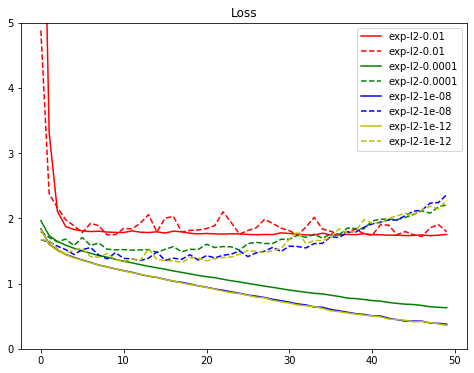

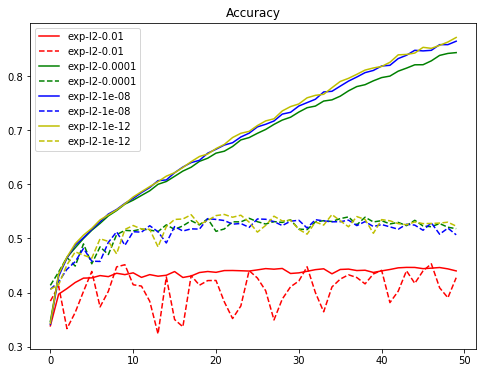

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

